In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
for dirname, _, filenames in os.walk('/RandomForestClassifier'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
warnings.filterwarnings('ignore')

data_csv = 'C:\\Users\\Rolan Ossi\\Documents\\second_hand_cars.csv'

In [18]:
read_data = pd.read_csv(data_csv, header=None)

read_data.shape

read_data.head()

,0,1,2,3,4,5
0,year,model,price,mileage,color,transmission
1,2011,SEL,21992,7413,Yellow,AUTO
2,2011,SEL,20995,10926,Gray,AUTO
3,2011,SEL,19995,7351,Silver,AUTO
4,2011,SEL,17809,11613,Gray,AUTO


In [19]:
columns_nm = ['year', 'model', 'price', 'mileage', 'color', 'transmission']


read_data.columns = columns_nm

columns_nm

read_data.head()

read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          151 non-null    object
 1   model         151 non-null    object
 2   price         151 non-null    object
 3   mileage       151 non-null    object
 4   color         151 non-null    object
 5   transmission  151 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [21]:
columns_nm = ['year', 'model', 'price', 'mileage', 'color', 'transmission']


for col_1 in columns_nm:
    
    print(read_data[col_1].value_counts())   


read_data['price'].value_counts()


read_data.isnull().sum()

x_axis = read_data.drop(['price'], axis=1)

y_axis = read_data['price']

2010    49
2009    42
2011    16
2008    14
2007    11
2006     6
2004     3
2000     3
2005     2
year     1
2012     1
2003     1
2002     1
2001     1
Name: year, dtype: int64
SE       78
SES      49
SEL      23
model     1
Name: model, dtype: int64
12995    7
13992    4
13995    4
16995    4
10995    3
        ..
14299    1
14355    1
14477    1
14480    1
3800     1
Name: price, Length: 118, dtype: int64
mileage    1
35871      1
36323      1
39211      1
44789      1
          ..
36447      1
35318      1
24929      1
23785      1
109259     1
Name: mileage, Length: 151, dtype: int64
Black     35
Silver    32
Red       25
Blue      17
Gray      16
White     16
Green      5
Yellow     3
color      1
Gold       1
Name: color, dtype: int64
AUTO            128
MANUAL           22
transmission      1
Name: transmission, dtype: int64


In [22]:
x_training_set, x_testing_set, y_training_set, y_testing_set = train_test_split(x_axis, y_axis, test_size = 0.33, random_state = 42)


x_training_set.shape, x_testing_set.shape


x_training_set.dtypes



x_training_set.head()

,year,model,mileage,color,transmission
65,2009,SE,9450,Black,AUTO
139,2003,SES,96000,White,AUTO
108,2008,SE,38286,Black,AUTO
112,2009,SES,42834,Red,AUTO
0,year,model,mileage,color,transmission


In [23]:
encoder = ce.OrdinalEncoder(cols=['year', 'model', 'mileage', 'color', 'transmission'])


x_training_set = encoder.fit_transform(x_training_set)

x_testing_set = encoder.transform(x_testing_set)

x_testing_set.head()

,year,model,mileage,color,transmission
76,1.0,4,-1.0,3,1
18,5.0,2,-1.0,5,1
82,1.0,1,-1.0,7,1
81,1.0,2,-1.0,7,1
143,12.0,1,-1.0,10,1


In [24]:
rfc = RandomForestClassifier(random_state=0)



rfc.fit(x_training_set, y_training_set)


y_predict = rfc.predict(x_testing_set)


print('10 decision-trees : {0:0.4f}'. format(accuracy_score(y_testing_set, y_predict)))




rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)





rfc_100.fit(x_training_set, y_training_set)




y_predict_100 = rfc_100.predict(x_testing_set)



print('100 decision-trees : {0:0.4f}'. format(accuracy_score(y_testing_set, y_predict_100)))

10 decision-trees : 0.0200
100 decision-trees : 0.0200


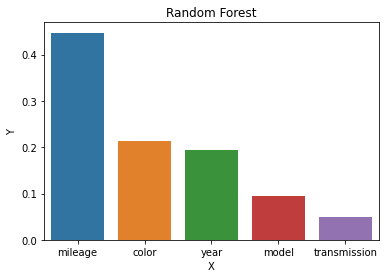

In [25]:
classifier = RandomForestClassifier(n_estimators=100, random_state=0)

classifier.fit(x_training_set, y_training_set)



scores = pd.Series(classifier.feature_importances_, index=x_training_set.columns).sort_values(ascending=False)
scores


sns.barplot(x=scores.index, y=scores)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Random Forest")
plt.show()

x_axis = read_data.drop(['year', 'price'], axis=1)
y_axis = read_data['price']

In [26]:
x_training_set, x_testing_set, y_training_set, y_testing_set = train_test_split(x_axis, y_axis, test_size = 0.33, random_state = 42)

encoder = ce.OrdinalEncoder(cols=['model', 'mileage', 'color', 'transmission'])


x_training_set = encoder.fit_transform(x_training_set)

x_testing_set = encoder.transform(x_testing_set)

classifier = RandomForestClassifier(random_state=0)


classifier.fit(x_training_set, y_training_set)


y_predict = classifier.predict(x_testing_set)

cm = confusion_matrix(y_testing_set, y_predict)

print('Confusion_Matrix:\n\n', cm)



print(classification_report(y_testing_set, y_predict))

Confusion_Matrix:

 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

       10770       0.00      0.00      0.00         0
       10995       0.00      0.00      0.00         2
       11450       0.00      0.00      0.00         1
       11749       0.00      0.00      0.00         1
       11984       0.00      0.00      0.00         1
       12595       0.00      0.00      0.00         1
       12704       0.00      0.00      0.00         0
       12995       0.00      0.00      0.00         2
       12998       0.00      0.00      0.00         1
       12999       0.00      0.00      0.00         1
       13384       0.00      0.00      0.00         1
       13584       0.00      0.00      0.00         1
       13599       0.00      0.00      0.00         1
       13895       0.00      0.00      0.00         0
       13950       0.09      1.00      0.16      